<a href="https://colab.research.google.com/github/parthvijoshi/BA820_Project_Team05/blob/main/final_m3_alonetv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A Data‑Driven Study of the Alone TV Series: Survival, Strategy, and Screens**



## Why we chose this project?
Alone is s survival TV series where 10 survivalists are dropped in an extremely remote area (Arctic winter) and must fend for themselves. Its impressive to see how the winning contestants use their skills, endurance, and mental fortitude to last 100 days in such a harsh living condition.

## Data Description
It uses a collection of datasets about the TV series:

1. `survivalists.csv`
A data frame of survivalists across all 9 seasons detailing name and demographics, location and profession, result, days lasted, reasons for tapping out (detailed and categorised), page URL.

| Feature Name   | Description |
| -------- | ------- |
| `season`  | The season number   |
| `name` | Name of the survivalist     |
| `version` | The version country code (currently only US but being preppred or other versions)|
| `id` | Survivalist unique ID |
| `age` | Age of survivalist |
| `gender` | Gender |
| `city` |  City |
| `state` | State |
| `country` | Country |
|`result`| Place the survivalist finished in the season|
| `days_lasted` | The number of days lasted in the game before tapping out or winning|
| `medically_evacuated` | Logical. If the survivalist was medically evacuated from the game |
| `reason_tapped_out` | The reason the survivalist tapped out of the game. NA means they were the winner |
| `reason_category` | A simplified category of the reason for tapping out |
| `team` | The team they were associated with (only for season 4)|
| `day_linked_up` | Day the team members linked up |
| `profession` | Profession of the survivalist |
---

2. `episodes.csv`
This dataset contains details of each episode including the title, number of viewers, beginning quote and IMDb rating.

| Feature Name   | Description |
| -------- | ------- |
| `version` | Country code for the version of the show |
| `season` | The season number |
| `episode_number_overall` | Episode number across seasons |
| `episode` | Episode number |
| `title` | Episode title |
| `air_date` | Date the episode originally aired |
| `viewers` | Number of viewers in the US (millions) |
| `quote` | The beginning quote |
| `author` | Author of the beginning quote |
|`imdb_rating` | IMDb rating of the episode |
| `n_ratings` | Number of ratings given for the episode |
----

3. `seasons.csv`
The season summary dataset includes location, latitude and longitude, and other season level information. It includes the date of drop off where the information exists.

| Feature Name   | Description |
| -------- | ------- |
| `version` | Country code for the version of the show |
| `season` | The season number |
| `location` | Location |
| `country` | Country |
| `n_survivors` | Number of survivalists in the season. In season 4 there were 7 teams of 2 |
| `lat` | Latitude |
| `lon` | Longitude |
| `date_drop_off` | The date the survivalists were dropped off |
---

4. `loadouts.csv`
Each survivalist is allowed to take with them 10 items. This dataset includes information on each survivalist’s loadout.

| Feature Name   | Description |
| -------- | ------- |
| `version` | Country code for the version of the show |
| `season` | The season number |
| `id` | Survivalist unique ID |
| `name` | Name of the survivalist |
| `item_number` | Item number |
| `item_detailed` | Detailed loadout item description |
| `item` | Loadout item. Simplified for aggregation |

# M3 - Synergy

In order to connect our work and questions, we needed two integrated analytical tables:
1. **Season level**
2. **Contestant level**

The season level table aggregates difficulty, casting mix, and audience metrics by season, while the contestant level table captures individual survival performance, demographics, and exposure, allowing us to run PCA and clustering in both spaces and compare how environmental harshness and player profiles jointly shape audience engagement.
​

**Mounting from drive for csv files**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Data Loading**

In [ ]:
epi = pd.read_csv('/content/drive/MyDrive/Spring2026/UnsupervisedML/BA820TeamProject/Phase1/AloneTVshow/episodes.csv')
ses = pd.read_csv('/content/drive/MyDrive/Spring2026/UnsupervisedML/BA820TeamProject/Phase1/AloneTVshow/seasons.csv')
sur = pd.read_csv('/content/drive/MyDrive/Spring2026/UnsupervisedML/BA820TeamProject/Phase1/AloneTVshow/survivalists.csv')
load = pd.read_csv('/content/drive/MyDrive/Spring2026/UnsupervisedML/BA820TeamProject/Phase1/AloneTVshow/loadouts.csv')
# epi = pd.read_csv('/content/drive/MyDrive/Spring2026/UnsupervisedML/BA820TeamProject/M3/episodes.csv')
# ses = pd.read_csv('/content/drive/MyDrive/Spring2026/UnsupervisedML/BA820TeamProject/M3/seasons.csv')
# sur = pd.read_csv('/content/drive/MyDrive/Spring2026/UnsupervisedML/BA820TeamProject/M3/survivalists.csv')
# load = pd.read_csv('/content/drive/MyDrive/Spring2026/UnsupervisedML/BA820TeamProject/M3/loadouts.csv')
#epi = pd.read_csv('/content/episodes.csv')
#ses = pd.read_csv('/content/seasons.csv')
#sur = pd.read_csv('/content/survivalists.csv')
#load = pd.read_csv('/content/loadouts.csv')

In [ ]:
epi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   version                 98 non-null     object 
 1   season                  98 non-null     int64  
 2   episode_number_overall  98 non-null     int64  
 3   episode                 98 non-null     int64  
 4   title                   98 non-null     object 
 5   air_date                98 non-null     object 
 6   viewers                 83 non-null     float64
 7   quote                   98 non-null     object 
 8   author                  98 non-null     object 
 9   imdb_rating             93 non-null     float64
 10  n_ratings               93 non-null     float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.6+ KB


# **1. Season Level Analysis**

**1.1 Data merging for advanced season analysis**

In [ ]:
# -----------------------------
# 1. Normalize version column
# -----------------------------
for _df in [epi, ses, sur, load]:
    if 'version' not in _df.columns:
        _df['version'] = 'US'


if 'id' not in sur.columns:
    sur = sur.copy()
    sur['id'] = sur['name']  # fallback to name as unique identifier

if 'id' not in load.columns:
    load = load.copy()
    load['id'] = load['name']  # fallback for loadouts
# -------------------------------------------------
# 2. PERSON–SEASON dataframe (canonical df)
# -------------------------------------------------
df = (
    sur.merge(
        ses[['version','season','location','lat','lon','date_drop_off']],
        on=['version','season'],
        how='left'
    )
    .groupby(['version','season','id','name'], as_index=False)
    .agg({
        'age': 'first',
        'gender': 'first',
        'profession': 'first',
        'city': 'first',
        'state': 'first',
        'country': 'first',
        'days_lasted': 'max',
        'result': 'first',
        'medically_evacuated': 'first',
        'reason_category': 'first',
        'location': 'first',
        'lat': 'first',
        'lon': 'first',
        'date_drop_off': 'first',
        'team':'first'
    })
)

# Hard guarantee: no duplicate people
assert df[['version','season','id']].duplicated().sum() == 0


# -------------------------------------------------
# 3. EPISODE DATA → season-level aggregation
# -------------------------------------------------
epi_season = (
    epi.groupby(['version','season'], as_index=False)
       .agg({
           'viewers': 'mean',
           'imdb_rating': 'mean',
           'n_ratings': 'mean'
       })
)

df = df.merge(
    epi_season,
    on=['version','season'],
    how='left'
)


# -------------------------------------------------
# 4. LOADOUT DATA → collapse per person
# -------------------------------------------------
load_person = (
    load[['version','season','id','item','item_detailed']]
    .drop_duplicates()
    .groupby(['version','season','id'], as_index=False)
    .agg({'item': list, 'item_detailed' : list})
)

df = df.merge(
    load_person,
    on=['version','season','id'],
    how='left'
)
df

,version,season,id,name,age,gender,profession,city,state,country,...,location,lat,lon,date_drop_off,team,viewers,imdb_rating,n_ratings,item,item_detailed
0,US,1,Alan Kay,Alan Kay,40,Male,Corrections Officer,Blairsville,Georgia,United States,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Saw, Axe, Sleeping bag, Pot, Ferro rod, Cante...","[Saw, Axe, Sleeping bag, Large 2-quart pot, Fe..."
1,US,1,Brant McGee,Brant McGee,44,Male,US Army Guard and Former US Coast Guard,Albemarle,North Carolina,United States,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Tarp, Paracord, Axe, Sleeping bag, Pot, Ferro...","[12×12 ground sheet tarp, 550 paracord – 20m, ..."
2,US,1,Chris Weatherman,Chris Weatherman,41,Male,Author,Umatilla,Florida,United States,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Saw, Axe, Sleeping bag, Ferro rod, Pot, Cante...","[Saw, Axe, Sleeping bag, Ferro rod, Large 2 qu..."
3,US,1,Dustin Feher,Dustin Feher,37,Male,Carpenter,Pittsburgh,Pennsylvania,United States,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Paracord, Axe, Sleeping bag, Pot, Ferro rod, ...","[550 paracord – 20m, Axe, Sleeping bag, Large ..."
4,US,1,Joe Robinet,Joe Robinet,24,Male,Carpenter,Windsor,Ontario,Canada,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Tarp, Paracord, Axe, Sleeping bag, Pot, Ferro...","[12x 12 tarp, 550 paracord – 20m, Axe, Sleepin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,US,9,Juan Pablo Quinonez,Juan Pablo Quinonez,30,Male,Outdoor Professional,Pinawa,Manitoba,Canada,...,Nunatsiavut,59.66000,-64.273611,2021-09-18,None,NaN,7.933333,27.666667,"[Ferro rod, Paracord, Pot, Axe, Fishing gear, ...","[Ferro rod, Paracord, 2-quart pot, Axe, Fishin..."
90,US,9,Karie Lee Knoke,Karie Lee Knoke,57,Female,Wilderness/Primitive Skills Instructor,Sandpoint,Idaho,United States,...,Nunatsiavut,59.66000,-64.273611,2021-09-18,None,NaN,7.933333,27.666667,"[Paracord, Sleeping bag, Pot, Ferro rod, Fishi...","[Paracord, Sleeping bag, 2-quart pot, Ferro ro..."
91,US,9,Teimojin Tan,Teimojin Tan,31,Male,Physician,Montreal,Quebec,Canada,...,Nunatsiavut,59.66000,-64.273611,2021-09-18,None,NaN,7.933333,27.666667,"[Sleeping bag, Axe, Multitool, Ferro rod, Pot,...","[Sleeping bag, Axe, Multitool, Ferro rod, 2-qu..."
92,US,9,Terry Burns,Terry Burns,30,Male,Commercial Fisherman,Homer,Alaska,United States,...,Nunatsiavut,59.66000,-64.273611,2021-09-18,None,NaN,7.933333,27.666667,"[Axe, Sleeping bag, Bow and arrows, Fishing ge...","[Axe, Sleeping bag, Bow and arrows, Fishing li..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   version              94 non-null     object 
 1   season               94 non-null     int64  
 2   id                   94 non-null     object 
 3   name                 94 non-null     object 
 4   age                  94 non-null     int64  
 5   gender               94 non-null     object 
 6   profession           94 non-null     object 
 7   city                 94 non-null     object 
 8   state                93 non-null     object 
 9   country              94 non-null     object 
 10  days_lasted          94 non-null     int64  
 11  result               94 non-null     int64  
 12  medically_evacuated  94 non-null     bool   
 13  reason_category      84 non-null     object 
 14  location             94 non-null     object 
 15  lat                  94 non-null     float

### **1.2 Data cleaning and preprocessing**
This block handles missing values, removes unused columns, transforms skewed variables, and converts categorical fields into the right types to prepare for analysis.
​



In [ ]:
#Dropping irrelevant columns
df_clean = df.drop(columns=[
    "id",
    "name",
    "city",
    "state",
    "date_drop_off",
    "team",
    "version",
    "item_detailed",
]).copy()

In [ ]:
#Missing Report
missing_count = df_clean.isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(df_clean)).round(3)

missing_report = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct})

missing_report

,missing_count,missing_pct
viewers,10,0.106
reason_category,10,0.106
season,0,0.000
age,0,0.000
country,0,0.000
days_lasted,0,0.000
gender,0,0.000
profession,0,0.000
medically_evacuated,0,0.000
result,0,0.000


In [ ]:
# Replacing missing exit reasons with "Unknown"
df_clean["reason_category"] = df_clean["reason_category"].fillna("Unknown")

In [ ]:
# First, imputing missing viewers using the median within each season
df_clean["viewers"] = df_clean["viewers"].fillna(df_clean.groupby("season")["viewers"].transform("median"))

# Then, filling an entire season 9 missing value with the overall median
df_clean["viewers"] = df_clean["viewers"].fillna(df_clean["viewers"].median())

In [ ]:
#Selecting numeric variables
num_vars = [
    "lon",
    "viewers",
    "n_ratings",
    "days_lasted",
    "age",
    "imdb_rating",
    "lat"]

# Computing skewness
df_clean[num_vars].skew().sort_values(ascending=False)

,0
lon,2.113712
viewers,0.684702
n_ratings,0.583941
days_lasted,0.176316
age,0.019834
imdb_rating,-0.108219
lat,-2.470944


In [ ]:
# Creating log versions
df_clean["log_viewers"] = np.log1p(df_clean["viewers"])
df_clean["log_n_ratings"] = np.log1p(df_clean["n_ratings"])

# Dropping raw skewed versions
df_clean = df_clean.drop(columns=["viewers", "n_ratings"])

In [ ]:
# Defining Categorical Variables
categorical_cols = [
    "gender",
    "profession",
    "country",
    "reason_category",
    "location",
    "season",
    "result",
    "item",
    "medically_evacuated"]

In [ ]:
# Sanity Check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               94 non-null     int64  
 1   age                  94 non-null     int64  
 2   gender               94 non-null     object 
 3   profession           94 non-null     object 
 4   country              94 non-null     object 
 5   days_lasted          94 non-null     int64  
 6   result               94 non-null     int64  
 7   medically_evacuated  94 non-null     bool   
 8   reason_category      94 non-null     object 
 9   location             94 non-null     object 
 10  lat                  94 non-null     float64
 11  lon                  94 non-null     float64
 12  imdb_rating          94 non-null     float64
 13  item                 94 non-null     object 
 14  log_viewers          94 non-null     float64
 15  log_n_ratings        94 non-null     float

# **Season-level Dataframe**


In [ ]:
season_df = (
    df_clean.groupby(['season'], as_index=False)
    .agg(
        # Survival difficulty
        mean_days_lasted=('days_lasted', 'mean'),

        # Audience engagement
        avg_viewers=('log_viewers', 'mean'),
        avg_imdb_rating=('log_n_ratings', 'mean'),
        avg_n_ratings=('log_n_ratings', 'mean'),

        # Demographics
        mean_age=('age', 'mean'),

        # Metadata
        lat=('lat', 'first'),
        lon=('lon', 'first')))

season_df

,season,mean_days_lasted,avg_viewers,avg_imdb_rating,avg_n_ratings,mean_age,lat,lon
0,1,21.600000,1.088461,4.630306,4.630306,35.100000,50.724440,-127.498056
1,2,34.400000,0.962822,4.216108,4.216108,41.900000,50.724440,-127.498056
2,3,54.300000,1.000779,4.130355,4.130355,36.700000,-41.000000,-68.000000
3,4,31.428571,0.921159,3.889777,3.889777,35.714286,50.724440,-127.498056
4,5,30.100000,0.883933,3.958907,3.958907,37.000000,49.750000,106.500000
5,6,45.400000,0.799553,4.092828,4.092828,40.200000,61.500278,-114.001111
6,7,49.900000,0.835869,4.316275,4.316275,36.700000,61.500278,-114.001111
7,8,41.200000,0.900872,4.072904,4.072904,41.400000,51.266667,-124.050000
8,9,46.100000,0.921159,3.355735,3.355735,37.600000,59.660000,-64.273611


Previously, the season table used only IMDb rating, average viewers,evacuation rate,exit rate,survival time and number of ratings to describe each season.
We have now integrated demographic features  into the same season‑level dataframe, so each season is characterized jointly by difficulty, contestant profile, and audience response.
​

### **1.3 Dimentionality Reduction - Principle Component Analysis (PCA)**
This selects the key numeric variables, standardizes them to a common scale, and applies PCA to compress them into a few uncorrelated components that capture most of the variation in survival, geography, and audience metrics. By working with these components instead of the full original feature set, we reduce noise and multicollinearity, make the structure of the data easier to visualize, and provide a stable, low dimensional basis for clustering both seasons and contestants.

In [ ]:
# Defining season-level numeric features for PCA
numeric_features = [
    "mean_days_lasted",
    "avg_viewers",
    "avg_imdb_rating",
    "avg_n_ratings",
    "mean_age",
    "lat",
    "lon"]

df_pca = season_df[numeric_features].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardising the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

transformed_data_df = pd.DataFrame(X_scaled, columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7'])
transformed_data_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.769991,2.018480,1.708753,1.708753,-1.248011,0.225580,-0.601629
1,-0.495825,0.477924,0.437213,0.437213,1.643541,0.225580,-0.601629
2,1.485105,0.943344,0.173960,0.173960,-0.567646,-2.794088,0.230481
3,-0.791614,-0.032939,-0.564586,-0.564586,-0.986800,0.225580,-0.601629
4,-0.923865,-0.489396,-0.352367,-0.352367,-0.440077,0.193501,2.670949
5,0.599161,-1.524047,0.058757,0.058757,0.920653,0.580333,-0.412867
6,1.047110,-1.078742,0.744714,0.744714,-0.567646,0.580333,-0.412867
7,0.181076,-0.281686,-0.002408,-0.002408,1.430927,0.243431,-0.553406
8,0.668842,-0.032939,-2.204035,-2.204035,-0.184941,0.519749,0.282596


This table shows the PCA scores for each season on the seven principal components.
​
Each row (season) is now represented by a compact PC vector instead of many original variables, capturing combined patterns of survival difficulty, geography, and audience metrics that will be used for clustering season

In [ ]:
from sklearn.decomposition import PCA

#Fitting PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Proportion of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_


**1.3.1 PCA fitting and scree plot**

This block fits PCA, computes explained variance, and plots a scree chart to decide how many components capture most of the structure in the data.

In [ ]:
!pip install psynlig -q

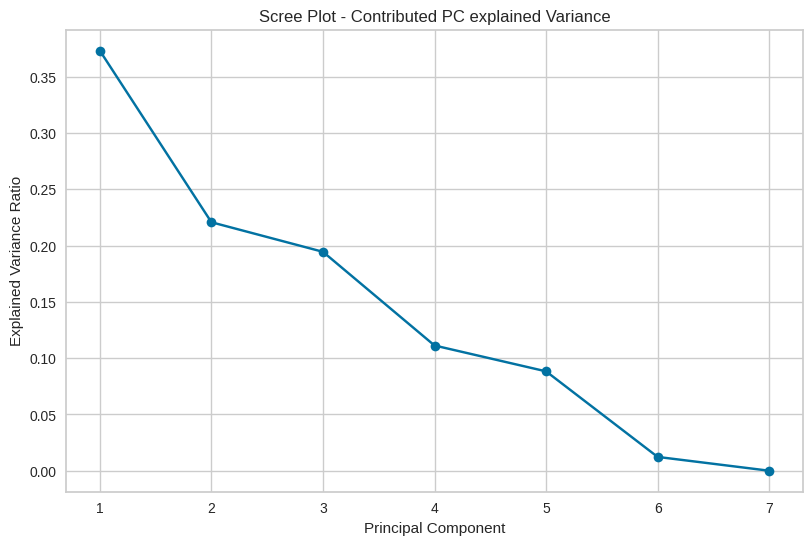

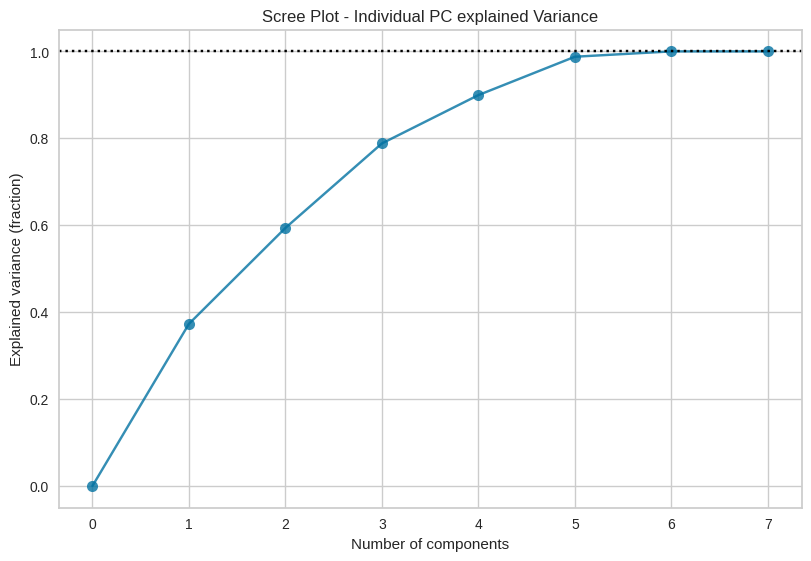

In [ ]:
# Visualising explained variance by component to choose dimensionality

plt.figure(figsize=(9.5,6))
plt.plot(range(1, len(explained_variance)+1),
         explained_variance,
         marker='o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

plt.xticks(range(1, len(explained_variance)+1))
plt.title('Scree Plot - Contributed PC explained Variance')
plt.show()
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(pca,  marker='o', markersize=8, alpha=0.8)
plt.title('Scree Plot - Individual PC explained Variance')
plt.show()

The **scree plots** for the season‑level PCA show that the first **three to four components** explain most of the variance, with a clear drop‑off in additional variance after PC4. This justifies using a small number of PCs to represent each season in clustering, instead of all original features.



**1.3.2 PCA loadings and interpretation**
This block creates a loadings table showing how each original variable contributes to each principal component, helping interpret the dimensions used for clustering.

In [ ]:
# Contribution of each feature to each PC

loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=df_pca.columns)

loadings_df.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
mean_days_lasted,-0.324,-0.033,0.681,0.151,-0.276,0.576,0.000
avg_viewers,0.424,-0.378,-0.020,-0.530,0.329,0.537,0.000
avg_imdb_rating,0.561,0.191,0.123,0.356,-0.036,0.070,0.707
avg_n_ratings,0.561,0.191,0.123,0.356,-0.036,0.070,-0.707
mean_age,-0.179,0.549,0.231,-0.020,0.782,0.038,-0.000
lat,-0.104,0.540,-0.575,-0.059,-0.261,0.543,-0.000
lon,-0.206,-0.436,-0.349,0.662,0.365,0.272,0.000


This table shows the PCA loadings for the season level features, indicating how strongly each original variable contributes to each principal component.
​

For example, audience metrics (avg_viewers, avg_imdb_rating, avg_n_ratings) load strongly on PC1, while mean_age and lat load heavily on PC2, and mean_days_lasted and lat contribute most to PC3, helping interpret the components as popularity, contestant/location mix, and difficulty dimensions.
​

In [ ]:
# Total variance explained by the first 3 PCs

total_variance = explained_variance[:3].sum()
print(f"{total_variance * 100:.2f}%")

78.82%


The first three principal components at the season level jointly explain about 78.82% of the total variance, so using these three PCs preserves most of the information from the original season features while giving a compact representation for clustering.

**1.3.3 Reduced dimension data**

This block refits PCA with the chosen number of components and produces a reduced‑dimension dataset that feeds into clustering algorithms.

In [ ]:
# Refitting PCA keeping only the first 3 components

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)

# **1.4 K Means for Season Level Analysis**

#### **1.4.1 Elbow Method**
This block uses the elbow method to plot distortion across different k values and identify a suitable k.

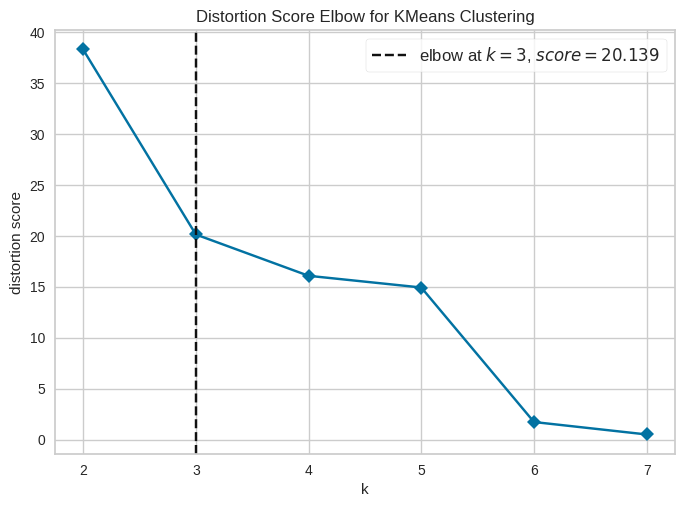

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(
    model,
    k=(2, 8),
    metric='distortion',
    timings=False)

visualizer.fit(X_reduced)
visualizer.show()

The elbow plot for season‑level KMeans shows a clear bend at **k = 3**, where the drop in distortion flattens noticeably. This supports using three clusters to segment seasons into hard, medium, and easy groups rather than adding more clusters with only minor gains in fit

#### **1.4.2 Silhouette Score**
This block computes and plots silhouette scores across k values to assess how well separated the candidate cluster solutions are.

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)

print(f"k={k}, silhouette={score:.3f}")

k=8, silhouette=0.059


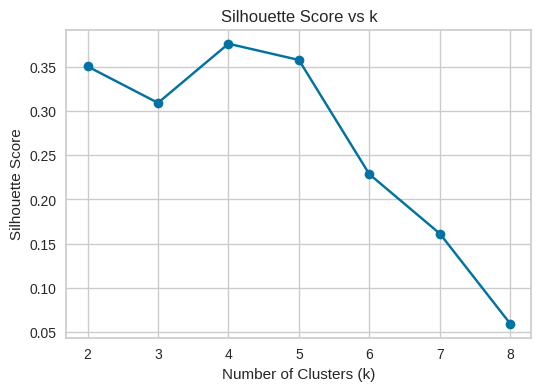

In [ ]:
sil_scores = []
k_values = range(2, 9)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_reduced)
    sil = silhouette_score(X_reduced, labels)
    sil_scores.append(sil)

# Plotting
plt.figure(figsize=(6,4))
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.xticks(k_values)
plt.show()

This silhouette plot says that **k = 4** clusters is the best choice: it has the highest silhouette score (around 0.38), meaning clusters are relatively tight and well separated at that k, and quality drops steadily for k > 4.
​



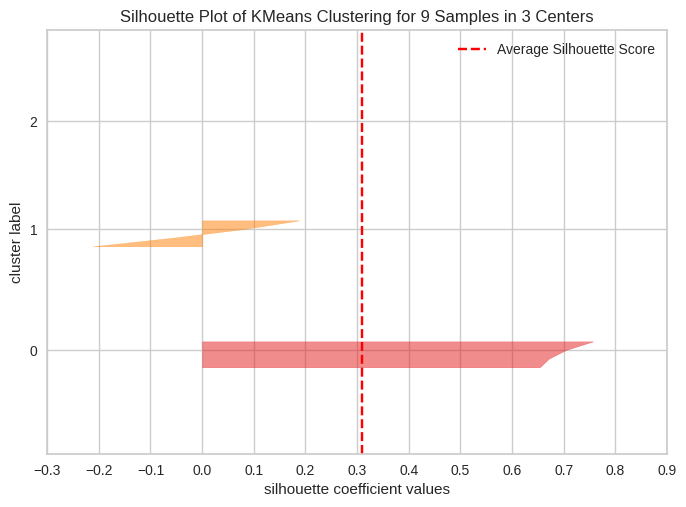

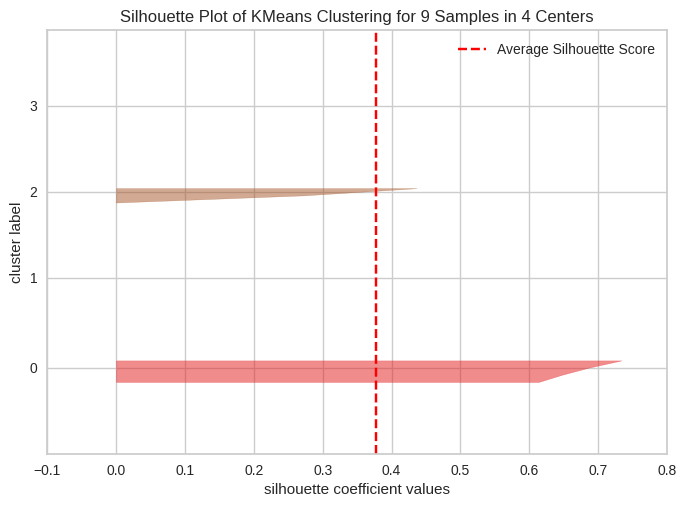

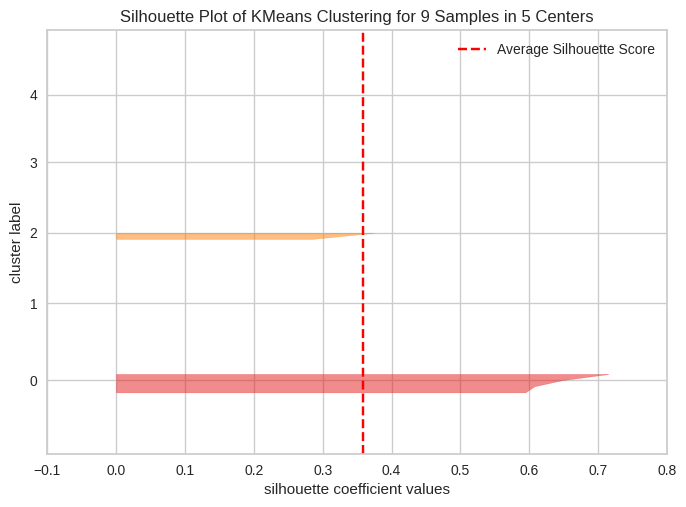

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in [3, 4, 5]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X_reduced)
    visualizer.show()

These silhouette plots help justify choosing k = 4 clusters over k = 5 for your KMeans solution.
* For **k = 5**, only two clusters are actually populated, so the model is wasting centers and giving the illusion of 5 groups while effectively using fewer.
* For **k = 4**, again only two clusters hold points, but the average silhouette score is higher and those clusters have generally larger silhouette coefficients, meaning tighter, better‑separated groups than with k = 5.
* Using **k = 3** is still reasonable: the elbow plot at the season level clearly bends at 3 clusters, meaning most of the gain in within‑cluster fit is achieved by k = 3, with only modest improvement afterward. Even though the silhouette curve peaks around k = 4, it stays fairly high at k = 3, so k = 3 is a defensible compromise that gives simpler, easier‑to‑interpret clusters (e.g., “easy / medium / hard seasons”) while preserving good separation between groups.




**1.4.3. K Means Clustering**

This block fits KMeans with the selected number of clusters and assigns a cluster label to each observation for further profiling and visualization.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


# Create a 3D scatter plot
fig = px.scatter_3d( #scatter_3d scatter
    transformed_data_df,
    x="PC1",  # First principal component
    y="PC2",  # Second principal component
    z="PC3",  # Third principal component

)

fig.update_traces(
    marker=dict(
        size=3,  # Smaller marker size
        opacity=0.7  # Transparency (alpha)
    )
)


# Add an arrow for each original dimensions
scale_factor = 2  # Adjust the scale factor as needed
for i, feature in enumerate(loadings_df.columns):
    fig.add_trace(
        go.Scatter3d(
            x=[0, scale_factor * loadings_df[feature].iloc[0]],
            y=[0, scale_factor * loadings_df[feature].iloc[1]],
            z=[0, scale_factor * loadings_df[feature].iloc[2]],
            mode="lines",
            line=dict(color="red", width=5),
            showlegend=False,
        )
    )
    fig.add_trace(
        go.Scatter3d(
            x=[scale_factor * loadings_df[feature].iloc[0]],
            y=[scale_factor * loadings_df[feature].iloc[1]],
            z=[scale_factor * loadings_df[feature].iloc[2]],
            mode="text",
            showlegend=False,
            text=[f"{feature}"],  # Bold text for better readability
            textfont=dict(size=15, color="red"),  # Match text color to the line
            textposition="top center",  # Position the text more naturally
        )
    )

# ensures all axes are at the same scale
fig.update_layout(
    scene=dict(
        aspectmode="data"
    )
)

# Show the plot
fig.show()


This shows THE 3D PCA plot,
where:
* **Blue points** are seasons projected into the first three principal components, giving you a low dimensional view of season similarities.
* **Red arrows (PC1–PC7)** are the loading vectors of the original variables, indicating which directions in this 3D space correspond to higher average viewers, IMDb ratings, latitude/longitude, days lasted, and age.



**1.4.4 Cluster Analysis**

This block summarizes each season cluster.

In [ ]:
n_cluster = 3
kmeans_result = KMeans(n_cluster).fit(transformed_data_df)

kmeans_result.cluster_centers_

array([[-0.08769372, -0.07761396,  0.5894057 ,  0.5894057 ,  0.4358927 ,
         0.37105156, -0.51647955],
       [-0.3488788 , -0.18509136, -1.04032942, -1.04032942, -0.53727251,
         0.3129434 ,  0.78397229],
       [ 1.48510501,  0.9433439 ,  0.17395979,  0.17395979, -0.56764595,
        -2.794088  ,  0.23048091]])

These three rows describe the typical profiles of your clusters.

In [ ]:


transformed_data_df['cluster_labels'] = kmeans_result.labels_

In [ ]:
# Plot clusters
px.scatter_3d(transformed_data_df, x='PC1', y='PC2',z ='PC3', color='cluster_labels')

This table summarizes the three season clusters.

* **Cluster 0** contains seasons with relatively younger casts, shorter survival times, harsher northern locations, and lower IMDb ratings, yet these seasons attract strong viewer interest and many ratings, reflecting high visibility but less admired outcomes.
* **Cluster 1** groups seasons with slightly older contestants, still below‑average survival duration, milder geography, and higher IMDb scores, but more modest audience reach, suggesting critically appreciated but less widely watched runs.
* **Cluster 2** represents seasons where very young contestants last much longer than average in comparatively easier locations, while audience reception and engagement are weaker, indicating endurance‑heavy stories that did not translate into top ratings or viewership.

**1.4.5 Reconstruction to original variables**

In this step we take the PCA and map it back into the original variable space, focusing on the variables that had the strongest positive loadings on the main components. This reconstruction lets us interpret each cluster directly in terms of age, days lasted, location, and audience metrics, rather than only in abstract principal component units.

In [ ]:
from sklearn.preprocessing import StandardScaler
transformed_data_d = transformed_data_df.drop('cluster_labels',axis = 1)
reconstruced_dat = scaler.inverse_transform(transformed_data_d.to_numpy())
reconstruced_dat_df = pd.DataFrame(reconstruced_dat, columns = ['mean_days_lasted', 'avg_viewers', 'avg_imdb_rating', 'avg_n_ratings',
       'mean_age', 'lat', 'lon'])

fig = px.scatter_3d(reconstruced_dat_df, x='avg_viewers', y='avg_n_ratings', z = 'avg_imdb_rating')
fig.update_traces(marker_size = 6, opacity = 0.7) # makes the points smaller (better visualization)

fig.show()


# **1.5 Season level Analysis Final Insights**
**Season clusters**
* **One cluster** groups seasons with shorter average survival, younger casts, harsher northern locations, lower IMDb ratings, but strong audience interest, representing highly watched but less critically appreciated seasons.
* **A second cluster** contains seasons with moderate survival times, slightly older contestants, milder geography, and higher IMDb ratings but only average audience size, characteristic of steady, well reviewed seasons.
* **The third cluster** captures seasons where contestants last much longer in relatively easier locations, yet audience engagement and ratings are weaker, suggesting endurance heavy runs that did not translate into standout popularity.


**Take aways for Alone**
* Season success is not driven by difficulty alone: clusters show that some of the most popular seasons combine tough conditions with strong casting rather than just extreme survival metrics.
* Producers could use these clusters to plan future seasons for example, aiming for the high popularity profile by balancing challenging locations with engaging contestants and pacing, rather than only increasing raw difficulty.


# **2. Contestant wise analysis**

**2.1 Data merging for advanced contestant level analysis**

This block builds a contestant‑level dataset with one row per unique player, including demographics, survival performance, and audience metrics.

In [ ]:
df_person_season = df.groupby(['version','season','name'], as_index=False).agg({
    'days_lasted': 'max',
    'age': 'first',
    'gender': 'first'
    # add more as needed
})
df_person_season_unique = df.drop_duplicates(subset='name', keep="first")
df_person_season_unique


,version,season,id,name,age,gender,profession,city,state,country,...,location,lat,lon,date_drop_off,team,viewers,imdb_rating,n_ratings,item,item_detailed
0,US,1,Alan Kay,Alan Kay,40,Male,Corrections Officer,Blairsville,Georgia,United States,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Saw, Axe, Sleeping bag, Pot, Ferro rod, Cante...","[Saw, Axe, Sleeping bag, Large 2-quart pot, Fe..."
1,US,1,Brant McGee,Brant McGee,44,Male,US Army Guard and Former US Coast Guard,Albemarle,North Carolina,United States,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Tarp, Paracord, Axe, Sleeping bag, Pot, Ferro...","[12×12 ground sheet tarp, 550 paracord – 20m, ..."
2,US,1,Chris Weatherman,Chris Weatherman,41,Male,Author,Umatilla,Florida,United States,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Saw, Axe, Sleeping bag, Ferro rod, Pot, Cante...","[Saw, Axe, Sleeping bag, Ferro rod, Large 2 qu..."
3,US,1,Dustin Feher,Dustin Feher,37,Male,Carpenter,Pittsburgh,Pennsylvania,United States,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Paracord, Axe, Sleeping bag, Pot, Ferro rod, ...","[550 paracord – 20m, Axe, Sleeping bag, Large ..."
4,US,1,Joe Robinet,Joe Robinet,24,Male,Carpenter,Windsor,Ontario,Canada,...,Quatsino,50.72444,-127.498056,None,None,1.9697,7.672727,101.545455,"[Tarp, Paracord, Axe, Sleeping bag, Pot, Ferro...","[12x 12 tarp, 550 paracord – 20m, Axe, Sleepin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,US,9,Juan Pablo Quinonez,Juan Pablo Quinonez,30,Male,Outdoor Professional,Pinawa,Manitoba,Canada,...,Nunatsiavut,59.66000,-64.273611,2021-09-18,None,NaN,7.933333,27.666667,"[Ferro rod, Paracord, Pot, Axe, Fishing gear, ...","[Ferro rod, Paracord, 2-quart pot, Axe, Fishin..."
90,US,9,Karie Lee Knoke,Karie Lee Knoke,57,Female,Wilderness/Primitive Skills Instructor,Sandpoint,Idaho,United States,...,Nunatsiavut,59.66000,-64.273611,2021-09-18,None,NaN,7.933333,27.666667,"[Paracord, Sleeping bag, Pot, Ferro rod, Fishi...","[Paracord, Sleeping bag, 2-quart pot, Ferro ro..."
91,US,9,Teimojin Tan,Teimojin Tan,31,Male,Physician,Montreal,Quebec,Canada,...,Nunatsiavut,59.66000,-64.273611,2021-09-18,None,NaN,7.933333,27.666667,"[Sleeping bag, Axe, Multitool, Ferro rod, Pot,...","[Sleeping bag, Axe, Multitool, Ferro rod, 2-qu..."
92,US,9,Terry Burns,Terry Burns,30,Male,Commercial Fisherman,Homer,Alaska,United States,...,Nunatsiavut,59.66000,-64.273611,2021-09-18,None,NaN,7.933333,27.666667,"[Axe, Sleeping bag, Bow and arrows, Fishing ge...","[Axe, Sleeping bag, Bow and arrows, Fishing li..."


For the contestant wise analysis we first build a contestant level table with 84 rows, where each row represents a unique player with their demographics, profession, home location, survival outcome, tap out reason, gear loadout, and the average viewers/IMDb ratings of their season. This integrated table lets us study how individual profiles and item choices relate to days lasted and audience interest, and it is the starting point for contestant level PCA and clustering.


**2.2 Data cleaning and preprocessing**

For the contestant level analysis we first restrict the data to unique players, then handle missing values in state, viewers, and exit reasons, and convert the gear list into a compact categorical representation. We also log transform skewed audience variables and cast demographic and outcome fields as categories, producing a tidy numeric categorical dataset that is suitable for PCA and clustering on individual survival profiles.




In [ ]:
#Dropping useless columns
dfps_clean = df_person_season_unique.drop(['version','date_drop_off','item_detailed','team'],axis = 1)

In [ ]:
#Missing Report
missing_count = dfps_clean.isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(dfps_clean)).round(3)

missing_report = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct})

missing_report

,missing_count,missing_pct
viewers,10,0.119
reason_category,9,0.107
state,1,0.012
season,0,0.000
age,0,0.000
name,0,0.000
id,0,0.000
gender,0,0.000
country,0,0.000
days_lasted,0,0.000


In [ ]:
# Replacing missing exit reasons and state with "Unknown"
dfps_clean["reason_category"] = dfps_clean["reason_category"].fillna("Unknown")
dfps_clean["state"] = dfps_clean["state"].fillna("Unknown")

In [ ]:
# First, imputing missing viewers using the median within each season
dfps_clean["viewers"] = dfps_clean["viewers"].fillna(dfps_clean.groupby("name")["viewers"].transform("median"))

# Then, filling an entire season 9 missing value with the overall median
dfps_clean["viewers"] = dfps_clean["viewers"].fillna(dfps_clean["viewers"].median())

In [ ]:
#Selecting numeric variables
num_vars = [
    "lon",
    "viewers",
    "n_ratings",
    "days_lasted",
    "age",
    "imdb_rating",
    "lat"]

# Computing skewness
dfps_clean[num_vars].skew().sort_values(ascending=False)

,0
lon,1.105563
viewers,0.514747
n_ratings,0.422503
days_lasted,0.116242
imdb_rating,0.091415
age,0.039548
lat,-2.291180


In [ ]:
# Creating log versions
dfps_clean["log_viewers"] = np.log1p(dfps_clean["viewers"])
dfps_clean["log_n_ratings"] = np.log1p(dfps_clean["n_ratings"])

# Dropping raw skewed versions
df_clean = dfps_clean.drop(columns=["viewers", "n_ratings"])

In [ ]:
# Defining Categorical Variables
categorical_cols = [
    "gender",
    "profession",
    "country",
    "reason_category",
    "location",
    "season",
    "result",
    "item",
    "medically_evacuated"]

In [ ]:
# Defining the numeric variables
numeric_cols = dfps_clean.select_dtypes(include=["int64","float64"]).columns

In [ ]:
#Sanity Check
dfps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 93
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               84 non-null     int64  
 1   id                   84 non-null     object 
 2   name                 84 non-null     object 
 3   age                  84 non-null     int64  
 4   gender               84 non-null     object 
 5   profession           84 non-null     object 
 6   city                 84 non-null     object 
 7   state                84 non-null     object 
 8   country              84 non-null     object 
 9   days_lasted          84 non-null     int64  
 10  result               84 non-null     int64  
 11  medically_evacuated  84 non-null     bool   
 12  reason_category      84 non-null     object 
 13  location             84 non-null     object 
 14  lat                  84 non-null     float64
 15  lon                  84 non-null     float64
 1

**Contestant level cleaned dataset**

After cleaning and preprocessing, the contestant level table contains 84 unique players with complete information on demographics, survival outcome, reasons for exit, location, gear summary, and log transformed audience metrics. The mix of categorical fields (e.g., gender, profession, country, location, result) and standardized numeric variables (days_lasted, age, lat/lon, IMDb rating, log_viewers, log_n_ratings) provides a tidy basis for PCA and clustering on individual survival profiles.


**2.3 Dimentionality Reduction - Principle Component Analysis (PCA)**

In [ ]:
# Defining numeric dataframe for PCA
df_pca = dfps_clean[numeric_cols].copy()
df_pca = df_pca.drop(['viewers','n_ratings'], axis =1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardising the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)
transformed_data_df = pd.DataFrame(X_scaled, columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7'])
transformed_data_df

ValueError: Shape of passed values is (84, 9), indices imply (84, 7)

**PCA results for contestants**

PCA on the cleaned contestant level numeric features reduces them to a smaller set of components that still capture most of the variation in survival, geography, and audience metrics. The first few principal components explain a large share of total variance, so each contestant can be described by a compact score vector that summarizes their performance and exposure instead of many correlated raw variables, which is what we then use for clustering.


In [ ]:
from sklearn.decomposition import PCA

#Fitting PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Proportion of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

**2.3.1 PCA Fitting and Scree plot**

In [ ]:
# Visualising explained variance by component to choose dimensionality

plt.figure(figsize=(9.5,6))
plt.plot(range(1, len(explained_variance)+1),
         explained_variance,
         marker='o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.xticks(range(1, len(explained_variance)+1))
plt.title('Contributed PC explained Variance')
plt.show()
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(pca,  marker='o', markersize=8, alpha=0.8)
plt.title('Individual PC explained Variance')
plt.show()

**Result note for the scree plots**

The scree plots show that the first few principal components explain most of the variance in the contestant level data, with a clear drop off after about the third component. This supports keeping three PCs for clustering, since additional components add relatively little information while increasing dimensionality and noise.



**2.3.2 PCA loadings and interpretation**

In [ ]:
# Contribution of each feature to each PC

loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=df_pca.columns)

loadings_df.round(3)

In [ ]:
# Total variance explained by the first 3 PCs

total_variance = explained_variance[:3].sum()
print(f"{total_variance * 100:.2f}%")





The first three principal components together explain about 69.29% of the total variance in the contestant level features, so using these three PCs preserves most of the information in the original numeric variables while giving a much more compact representation for clustering.
​

**2.3.3 Reduced dimension data**

In [ ]:
# Refitting PCA keeping only the first 3 components

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)

# **2.4 K Means for Season Level Analysis**

**2.4.1 Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(
    model,
    k=(2, 8),
    metric='distortion',
    timings=False)

visualizer.fit(X_reduced)
visualizer.show()

The elbow plot shows a clear bend around k = 5, where the reduction in distortion begins to level off compared with smaller k values. This suggests that five clusters provide a good trade off between capturing contestant level structure.

**2.4.2 Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score
sil_scores = []
k_values = range(2, 7)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_reduced)
    sil = silhouette_score(X_reduced, labels)
    sil_scores.append(sil)

# Plotting
plt.figure(figsize=(6,4))
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.xticks(k_values)
plt.show()

for k, score in zip(k_values, sil_scores):
    print(f"k={k}: silhouette={score:.3f}")

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in [4, 5, 6]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X_reduced)
    visualizer.show()

The silhouette diagnostics show that k=5 gives the highest average silhouette score, with all five clusters having mostly positive and reasonably wide silhouettes. Compared with k=4 and k=6, the five cluster solution keeps groups well separated without creating very thin or noisy clusters, so we adopt five contestant clusters for interpretation.

**2.4.3. K Means Clustering**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


# Create a 3D scatter plot
fig = px.scatter_3d( #scatter_3d scatter
    transformed_data_df,
    x="PC1",  # First principal component
    y="PC2",  # Second principal component
    z="PC3",  # Third principal component

)

fig.update_traces(
    marker=dict(
        size=3,  # Smaller marker size
        opacity=0.7  # Transparency (alpha)
    )
)


# Add an arrow for each original dimensions
scale_factor = 2  # Adjust the scale factor as needed
for i, feature in enumerate(loadings_df.columns):
    fig.add_trace(
        go.Scatter3d(
            x=[0, scale_factor * loadings_df[feature].iloc[0]],
            y=[0, scale_factor * loadings_df[feature].iloc[1]],
            z=[0, scale_factor * loadings_df[feature].iloc[2]],
            mode="lines",
            line=dict(color="red", width=5),
            showlegend=False,
        )
    )
    fig.add_trace(
        go.Scatter3d(
            x=[scale_factor * loadings_df[feature].iloc[0]],
            y=[scale_factor * loadings_df[feature].iloc[1]],
            z=[scale_factor * loadings_df[feature].iloc[2]],
            mode="text",
            showlegend=False,
            text=[f"{feature}"],  # Bold text for better readability
            textfont=dict(size=15, color="red"),  # Match text color to the line
            textposition="top center",  # Position the text more naturally
        )
    )

# ensures all axes are at the same scale
fig.update_layout(
    scene=dict(
        aspectmode="data"
    )
)

# Show the plot
fig.show()


The 3D plot shows each contestant as a point in the space of the first three principal components, with red arrows indicating how the original variables load onto this space. Contestants spread mainly along the audience and survival dimensions, and the loading directions confirm that log viewers and log ratings drive one axis while geography and days lasted shape the others, supporting the interpretation used later in clustering.

**2.4.4 Cluster Analysis**

In [ ]:
n_cluster = 5
kmeans_result = KMeans(n_cluster).fit(transformed_data_df)

kmeans_result.cluster_centers_

The KMeans cluster centers in PCA space show that each of the five contestant clusters occupies a distinct region along the survival, audience, and geography components. Some clusters are characterized by strongly negative or positive scores on particular PCs, indicating different combinations of days lasted, viewer interest, and location patterns that define each survival profile.
​

In [ ]:
#Cluster labels
transformed_data_df['cluster_labels'] = kmeans_result.labels_

In [ ]:
# Plot clusters
px.scatter_3d(transformed_data_df, x='PC1', y='PC2',z ='PC3', color='cluster_labels')

The 3D scatter plot of the first three principal components coloured by cluster labels shows five clearly separated contestant groups in PCA space. Each colour band corresponds to a distinct survival profile, confirming that the chosen k captures meaningful structure: some clusters occupy high survival, high audience regions, while others group shorter stay contestants with lower exposure.

In [ ]:
# 1. Check cluster labels directly
import numpy as np
print("Unique labels in transformed_data_df:", np.unique(transformed_data_df['cluster_labels']))

# 2. Attach to contestant-level data (same length: 84)
dfps_with_clusters = dfps_clean.copy()
print("Rows dfps_clean:", len(dfps_clean), "Rows transformed_data_df:", len(transformed_data_df))

dfps_with_clusters['cluster'] = transformed_data_df['cluster_labels'].values
print("Unique clusters in dfps_with_clusters:", dfps_with_clusters['cluster'].unique())


In [ ]:
cluster_members = (
    dfps_with_clusters
    .sort_values(['cluster', 'season', 'name'])
    [['cluster', 'season', 'name', 'days_lasted', 'imdb_rating']]
)

cluster_summary = (
    dfps_with_clusters
    .groupby('cluster', as_index=False)
    .agg(
        n_contestants = ('name', 'nunique'),
        avg_days      = ('days_lasted', 'mean'),
        avg_age       = ('age', 'mean'),
        avg_imdb      = ('imdb_rating', 'mean')
    )
)

cluster_members
cluster_summary


This table summarizes the five contestant clusters and how they differ in size and performance.
1. **Cluster 0** (15 contestants) consists of older players on average (about 45 years) who last around 20 days and achieve relatively high IMDb ratings for their seasons (7.92).
2. **Cluster 1** (10 contestants) contains strong long run survivors, with mean survival over 54 days and solid ratings (7.82), representing classic “deep run” contestants.
3. **Cluster 2** (13 contestants) is a younger group (average age 35) with shorter stays (21 days) and somewhat lower ratings (7.65), indicating moderate impact on the show.
4. **Cluster 3** (20 contestants) holds many mid length survivors (35 days on average) but in seasons with the lowest ratings (7.39), suggesting less engaging outcomes despite moderate stays.
5. **Cluster 4** (26 contestants) is the largest group, combining fairly long survival (59 days) with the highest IMDb ratings (8.06), capturing the contestants most associated with highly rated, compelling seasons.

**2.4.5 Reconstruction to original variables**

In [ ]:
from sklearn.preprocessing import StandardScaler
transformed_data_df = transformed_data_df.drop('cluster_labels',axis = 1)
reconstruced_data = scaler.inverse_transform(transformed_data_df.to_numpy())
reconstruced_data_df = pd.DataFrame(reconstruced_data, columns = ['age','days_lasted','lat', 'lon','imdb_rating','log_viewers','log_n_ratings'])

fig = px.scatter_3d(reconstruced_data_df, x='days_lasted', y='imdb_rating', z='lon')
fig.update_traces(marker_size = 3, opacity = 0.7) # makes the points smaller (better visualization)

fig.show()


In the reconstruction step we invert the PCA scaling back into the original variable space and visualize contestants in terms of days_lasted, IMDb rating, and geographic coordinates. This confirms that the patterns seen in PCA space correspond to meaningful differences in real units—some contestants cluster around higher ratings and longer stays in specific regions, while others concentrate at shorter runs or lower rated seasons.

# **2.5 Contestant level analysis Final Insights**

Contestants naturally group into five survival profiles that differ in typical days lasted, age, and the IMDb ratings of the seasons they appear in.
* Two clusters (1 and 4) capture the long‑run survivors, with average stays around 54–59 days and the highest IMDb ratings, suggesting that deep runs and high perceived difficulty strongly contribute to audience appreciation.
* Short to mid duration clusters (0 and 2) contain contestants who last about 20–22 days; Cluster 0 skews older and appears in better rated seasons than Cluster 2, indicating that narrative role and season context matter as much as raw survival time.
* Cluster 3 holds many mid‑length survivors (~35 days) but is associated with the lowest IMDb ratings, showing that moderate survival without standout drama or difficulty may not translate into strong engagement.

Overall, the contestant‑level clustering suggests that viewers are most engaged when seasons feature a mix of very durable contestants and clear high‑stakes narratives, while average or “quiet” survival runs contribute less to ratings even if they last a reasonable number of days.

**Reference**

1. [wiki page](https://en.wikipedia.org/wiki/Alone_(TV_series)
2. [stat.cmu](https://www.stat.cmu.edu/capstoneresearch/fall2023/315files_f23/team10.html)
3. [stackoverflow..com](https://stackoverflow.com/questions)
4. [Clustering - Sckit](https://scikit-learn.org/stable/modules/clustering.html)
5. [Clustering](https://www.geeksforgeeks.org/machine-learning/clustering-in-machine-learning/)
6. [Alone News](https://www.legit.ng/entertainment/tv-shows/1553658-has-died-how-dangerous-tv-show/)
7. [Alone contestants](https://www.reddit.com/r/Alonetv/comments/12tcujd/alone_data_set_for_analysis/)

# **Generative AI Disclosure**

* ChatGPT was used selectively for writing and coding assistance, under full team validation and oversight.
* Code standardization: Helped align style and reduce warnings; all notebooks were re‑run end‑to‑end by the team to verify correctness.
* Writing and documentation: Assisted with grammar and wording; every numeric statement was cross‑checked against our own tables and figures, and text was kept only when it matched our results.
* Visualization refinement: Suggested clearer axis labels, legends, and color choices; all plots were regenerated directly from our data and reviewed by the team.
* Generative AI was not used to derive conclusions or interpret results; final interpretations and decisions are entirely our own.*

* Links to ChatGPT Conversation:
[Chat GPT Link](https://chatgpt.com/share/69931c5a-5034-8010-a9d4-1c867eaaf76b)